In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

In [2]:
!git clone https://github.com/Noahbisht0/chestXray-dataset.git

Cloning into 'chestXray-dataset'...
remote: Enumerating objects: 1457, done.
remote: Total 1457 (delta 0), reused 0 (delta 0), pack-reused 1457
Receiving objects: 100% (1457/1457), 575.16 MiB | 36.99 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [3]:
train_df = pd.read_csv("chestXray-dataset/nih/train-small.csv")
print(f"there are {train_df.shape[0]} rows and {train_df.shape[1]} columns")
train_df.head()

there are 1000 rows and 16 columns


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

In [ ]:
print(f"the total patient ids are {train_df.shape[0]} and from those total unique id are {train_df['PatientId'].value_counts().shape[0]}")

the total patient ids are 1000 and from those total unique id are 928


In [ ]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [ ]:
columns.remove("Image")
columns.remove("PatientId")

In [ ]:
print(f"there are {len(columns)} now !!")

there are 14 now !!


In [ ]:
for column in columns:
  print(f"the columns have {train_df[column].sum()} samples")

the columns have 106 samples
the columns have 20 samples
the columns have 33 samples
the columns have 16 samples
the columns have 128 samples
the columns have 13 samples
the columns have 14 samples
the columns have 2 samples
the columns have 175 samples
the columns have 45 samples
the columns have 54 samples
the columns have 21 samples
the columns have 10 samples
the columns have 38 samples


Display random images


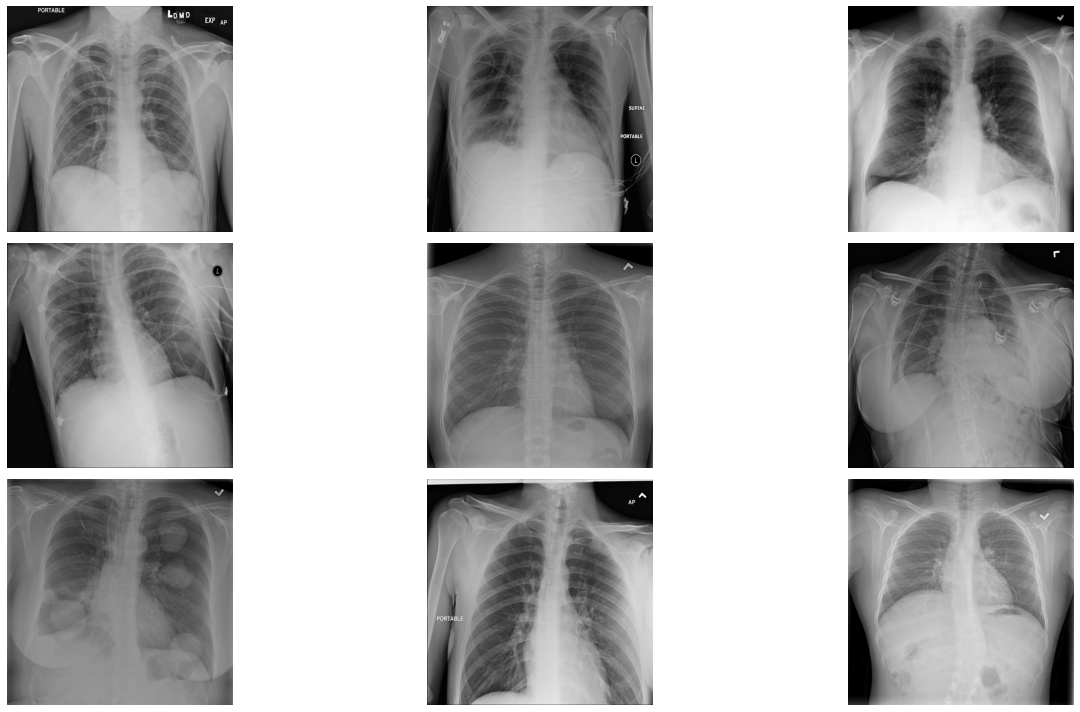

In [ ]:
images = train_df['Image'].values
random_images = [np.random.choice(images) for i in range(9)]
img_dir = "nih/images-small/"
print("Display random images")
plt.figure(figsize=(20,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  img = plt.imread(os.path.join(img_dir,random_images[i]))
  plt.imshow(img,cmap="gray")
  plt.axis('off')
plt.tight_layout()

the dimensions of the image: (1024, 1024)
the maximum pixel value 1.0000 and minimum pixel value 0.0000
the mean value is 0.4841 and standard deviation is 0.2792


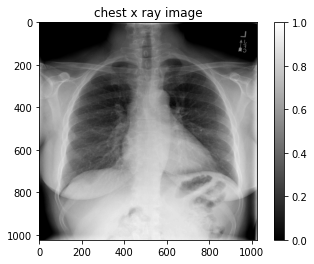

In [ ]:
sample_img = train_df.Image[90]

raw_image = plt.imread(os.path.join(img_dir,sample_img))
plt.imshow(raw_image,cmap='gray')
plt.colorbar()
plt.title("chest x ray image")
print(f"the dimensions of the image: {raw_image.shape}")
print(f"the maximum pixel value {raw_image.max():.4f} and minimum pixel value {raw_image.min():.4f}")
print(f"the mean value is {raw_image.mean():.4f} and standard deviation is {raw_image.std():.4f}")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

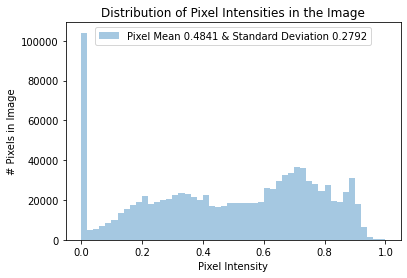

In [ ]:
sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator = ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True)

In [ ]:
generator = image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory="nih/images-small/",
    x_col = "Image",
    y_col = ['Mass'],
    class_mode = "raw",
    batch_size = 1,
    shuffle=False,
    target_size = (320,320)
)

Found 673 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 327 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 2.4580 and the minimum is -1.9169
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


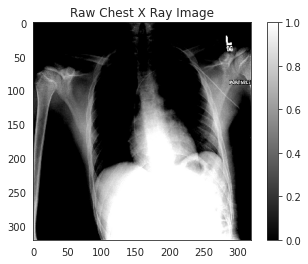

In [ ]:
sns.set_style("white")
generated_image, label = generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

In [ ]:
print(label[0])

[0]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixel')

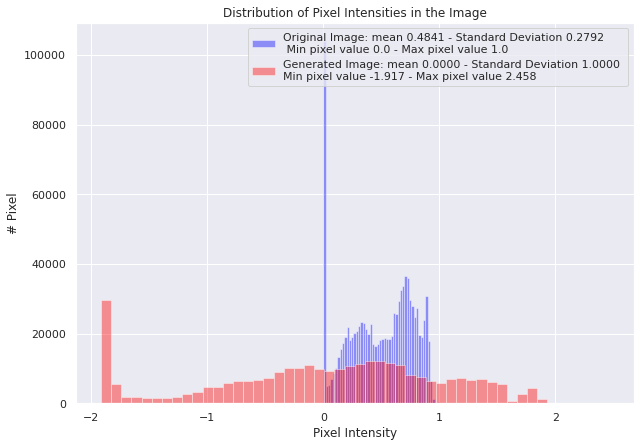

In [ ]:
sns.set()
plt.figure(figsize=(10, 7))

sns.distplot(raw_image.ravel(), 
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue', 
             kde=False)

sns.distplot(generated_image[0].ravel(), 
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}', 
             color='red', 
             kde=False)

plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')